In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("prisoners.csv")

In [17]:
# 1a. Load the dataset and display first and last 5 rows
print("First 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())

First 5 rows:
            STATE/UT  YEAR  No. of Inmates benefitted by Elementary Education  \
0     Andhra Pradesh  2013                                               9480   
1  Arunachal Pradesh  2013                                                  0   
2              Assam  2013                                                676   
3              Bihar  2013                                               1693   
4        Chhatisgarh  2013                                               1664   

   No. of Inmates benefitted by Adult Education  \
0                                         13758   
1                                             0   
2                                           750   
3                                          3013   
4                                          1803   

   No. of Inmates benefitted by Higher Education  \
0                                            672   
1                                              0   
2                                   

In [23]:
# 1b. Describe the dataset and find number of columns
print("\nDescription of dataset:")
print(df.describe())

print("\nNumber of columns:", df.shape[1])

# Find rows where all inmate benefit counts are zero
zero_inmates = df.loc[
    (df['No. of Inmates benefitted by Elementary Education'] == 0) &
    (df['No. of Inmates benefitted by Adult Education'] == 0) &
    (df['No. of Inmates benefitted by Higher Education'] == 0) &
    (df['No. of Inmates benefitted by Computer Course'] == 0) 
]
print("\nRows with zero inmates benefitted in all categories:")
print(zero_inmates)



Description of dataset:
         YEAR  No. of Inmates benefitted by Elementary Education  \
count    35.0                                          35.000000   
mean   2013.0                                        1057.914286   
std       0.0                                        2078.196777   
min    2013.0                                           0.000000   
25%    2013.0                                           0.000000   
50%    2013.0                                         167.000000   
75%    2013.0                                        1294.500000   
max    2013.0                                        9480.000000   

       No. of Inmates benefitted by Adult Education  \
count                                     35.000000   
mean                                    1534.857143   
std                                     3022.110503   
min                                        0.000000   
25%                                        6.500000   
50%                             

In [27]:
# 2a. Create new column: total_benefitted
benefit_columns = [
    'No. of Inmates benefitted by Elementary Education',
    'No. of Inmates benefitted by Adult Education',
    'No. of Inmates benefitted by Higher Education',
    'No. of Inmates benefitted by Computer Course'
]
df['total_benefitted'] = df[benefit_columns].sum(axis=1)

print("\nData with 'total_benefitted' column added:")
print(df[['STATE/UT', 'total_benefitted']].head())


Data with 'total_benefitted' column added:
            STATE/UT  total_benefitted
0     Andhra Pradesh             24080
1  Arunachal Pradesh                 0
2              Assam              1470
3              Bihar              6248
4        Chhatisgarh              3762


In [29]:
# 2b. Create new row: totals across all states
totals = df[benefit_columns + ['total_benefitted']].sum()
totals['STATE/UT'] = 'Total'
df_totals = pd.DataFrame([totals])
df = pd.concat([df, df_totals], ignore_index=True)

print("\nAppended totals row:")
print(df.tail(1))


Appended totals row:
   STATE/UT  YEAR  No. of Inmates benefitted by Elementary Education  \
35    Total   NaN                                              37027   

    No. of Inmates benefitted by Adult Education  \
35                                         53720   

    No. of Inmates benefitted by Higher Education  \
35                                           8311   

    No. of Inmates benefitted by Computer Course  total_benefitted  
35                                          7356            106414  


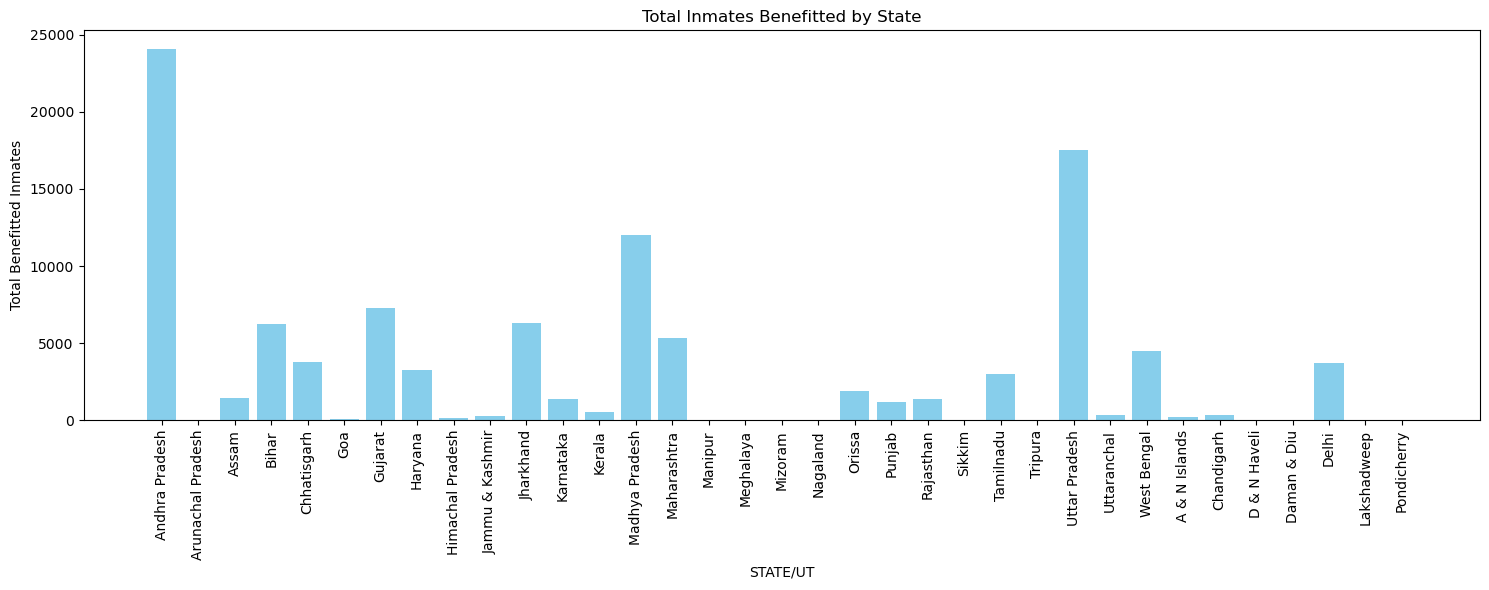


State with maximum beneficiaries: Andhra Pradesh (24080)


In [31]:
# 3a. Bar plot of total benefitted by state
plt.figure(figsize=(15, 6))
states = df[df['STATE/UT'] != 'Total']
plt.bar(states['STATE/UT'], states['total_benefitted'], color='skyblue')
plt.xlabel("STATE/UT")
plt.ylabel("Total Benefitted Inmates")
plt.title("Total Inmates Benefitted by State")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("total_benefitted_by_state.png")
plt.show()

# Which state has max beneficiaries?
max_state = states.loc[states['total_benefitted'].idxmax()]
print(f"\nState with maximum beneficiaries: {max_state['STATE/UT']} ({max_state['total_benefitted']})")

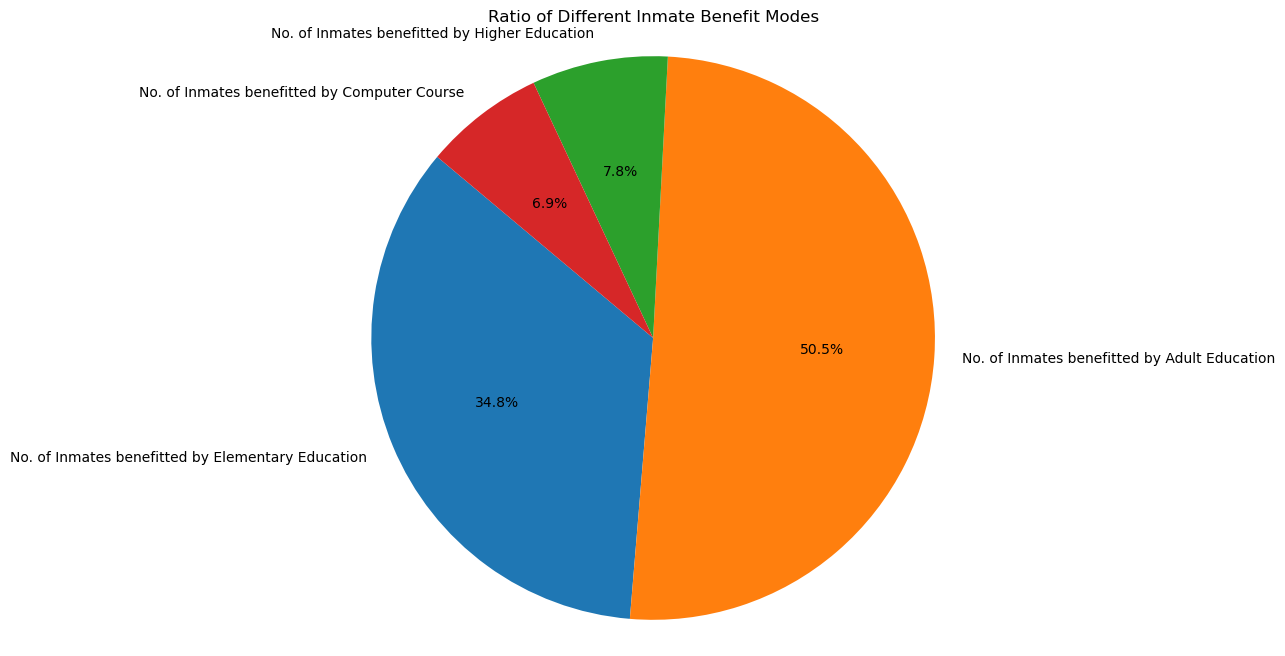

In [33]:
# 3b. Pie chart of benefit types ratio
plt.figure(figsize=(8, 8))
benefit_sums = df_totals[benefit_columns].values.flatten()
plt.pie(benefit_sums, labels=benefit_columns, autopct='%1.1f%%', startangle=140)
plt.title("Ratio of Different Inmate Benefit Modes")
plt.axis('equal')
plt.savefig("benefit_modes_pie_chart.png")
plt.show()